In [24]:
import yfinance as yf
from datetime import datetime
import pandas as pd
import numpy as np
import dateutil.relativedelta as relativedelta

tickets = ["MSFT", "AAPL"]

ticketsYF = yf.Tickers(tickets)

start_date = '2018-11-22'
rd = relativedelta.relativedelta(months = 24)
end_date = (datetime.strptime(start_date, "%Y-%m-%d") + rd).strftime("%Y-%m-%d")

dfRaw = ticketsYF.history(start=start_date, end=end_date)

[*********************100%***********************]  2 of 2 completed


In [31]:
dfCummRet = (((dfRaw["Close"].pct_change() + 1).cumprod() - 1) * np.array([-500, 1000]))
dfCummRet["port"] = dfCummRet["AAPL"] + dfCummRet["MSFT"]
dfCummRet

,AAPL,MSFT,port
Date,,,
2018-11-23,NaN,NaN,NaN
2018-11-26,-6.761876,32.987309,26.225433
2018-11-27,-5.659212,39.487421,33.828209
2018-11-28,-25.103080,78.102191,52.999111
2018-11-29,-21.069306,69.079168,48.009862
...,...,...,...
2020-11-16,-929.706396,1155.772781,226.066386
2020-11-17,-918.891401,1128.283576,209.392175
2020-11-18,-902.728552,1100.224739,197.496187


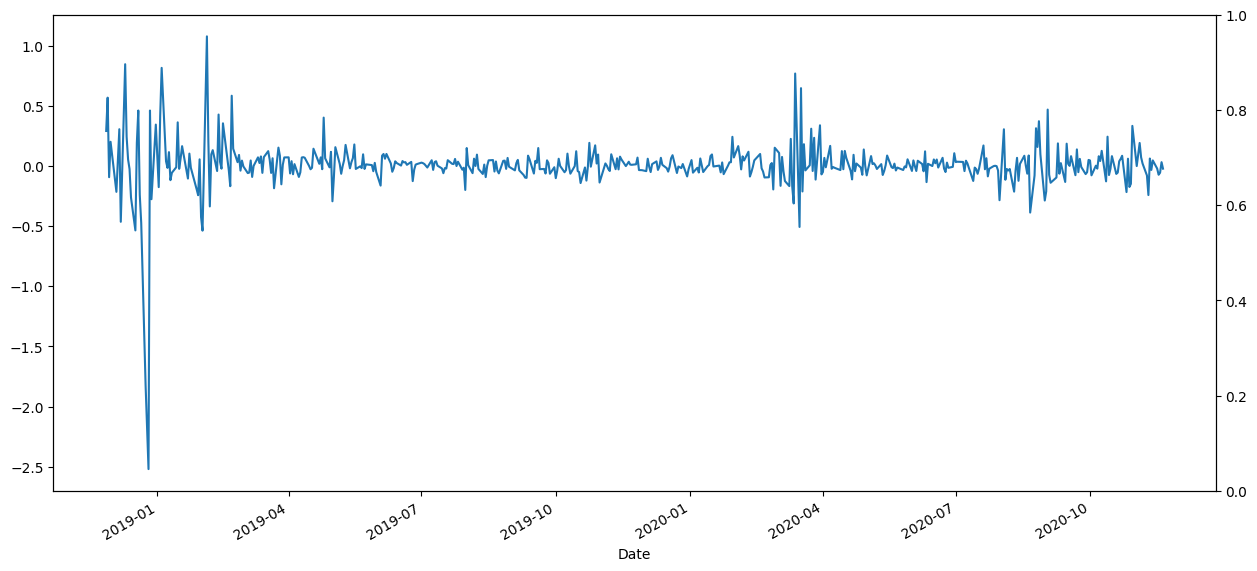

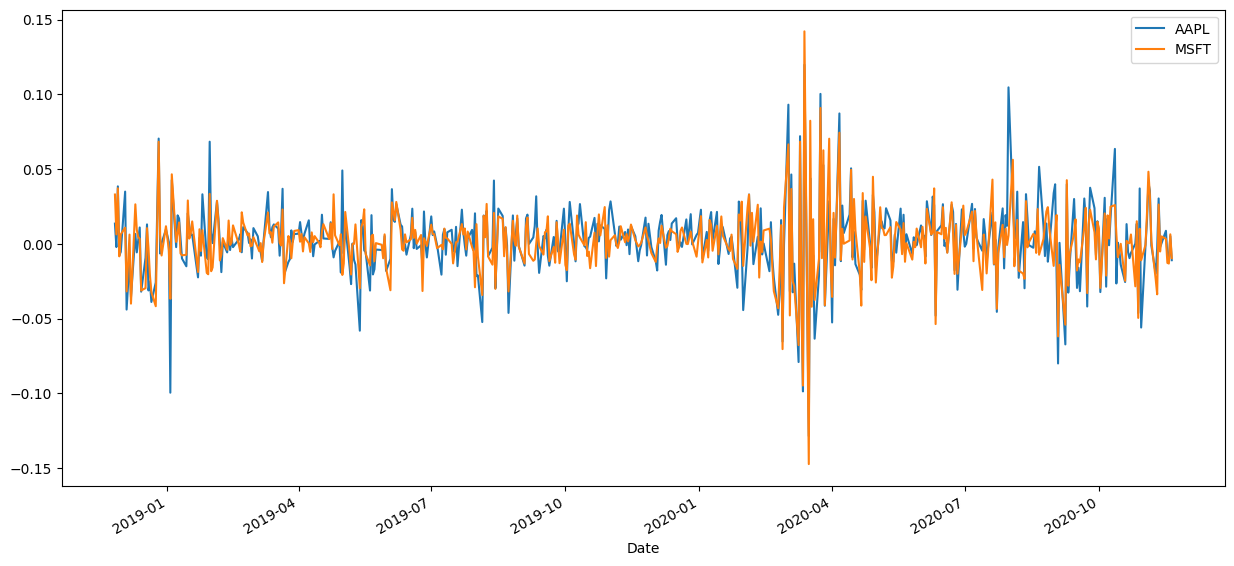

In [32]:
ax = dfCummRet["port"].pct_change().plot(figsize = (15, 7))
ax2 = ax.twinx()
ax2 = (dfRaw["Close"].pct_change()).plot(figsize = (15, 7))

<Axes: xlabel='Date'>

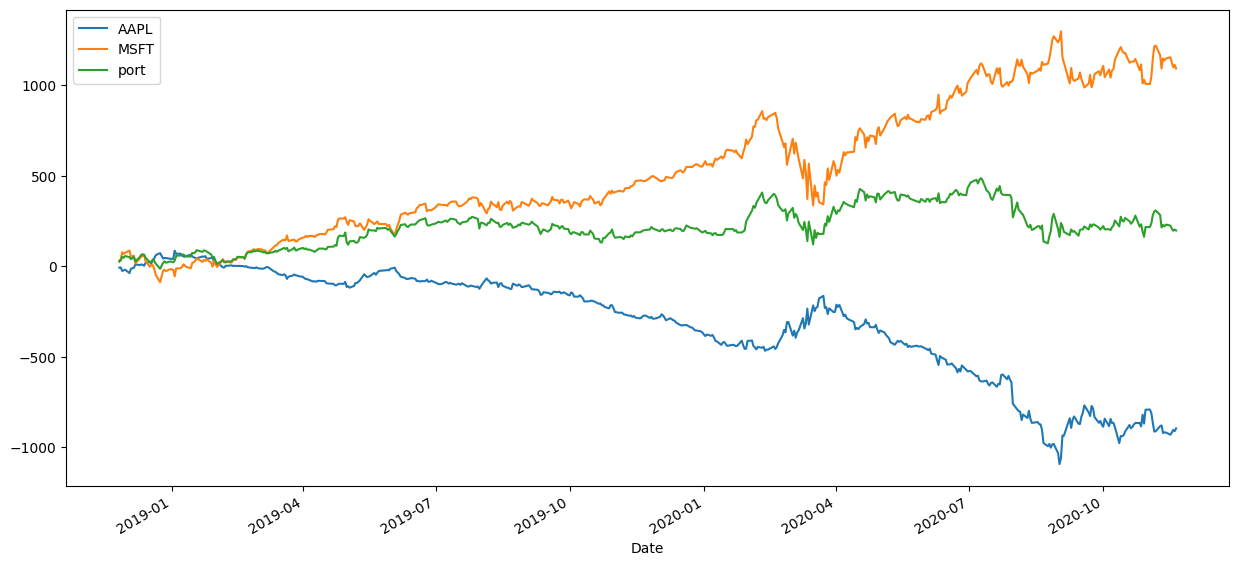

In [33]:
dfCummRet.plot(figsize = (15, 7))

<Axes: xlabel='Date'>

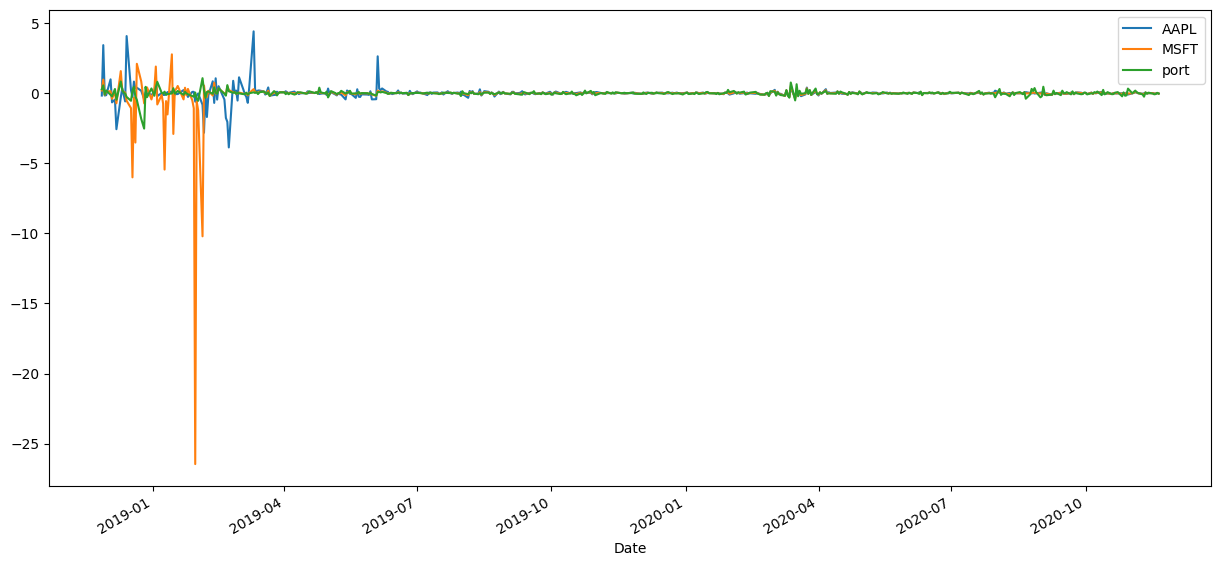

In [34]:
dfCummRet.pct_change().plot(figsize = (15, 7))

In [35]:
dfCummRet.pct_change().describe()  # -500 AAPL 1000 MSFT

,AAPL,MSFT,port
count,501.000000,501.000000,501.000000
mean,0.011420,-0.095178,0.005994
std,0.470837,1.357354,0.207904
min,-3.864740,-26.460206,-2.519550
25%,-0.032651,-0.027961,-0.045743
50%,0.003129,0.006221,-0.000353
75%,0.050597,0.040929,0.059591
max,4.418169,2.777676,1.076095


In [30]:
dfCummRet.pct_change().describe() # 1000 AAPL -500 MSFT

,AAPL,MSFT,port
count,501.000000,501.000000,501.000000
mean,0.011420,-0.095178,-0.011486
std,0.470837,1.357354,1.919387
min,-3.864740,-26.460206,-21.303801
25%,-0.032651,-0.027961,-0.052870
50%,0.003129,0.006221,0.007457
75%,0.050597,0.040929,0.063352
max,4.418169,2.777676,16.327515
